This note gives the details of calculating the potential between $\psi' J/\psi$

In [ ]:
const mb = 5.27; const mk = 0.495; const mkstar=0.892; const mdstar=2.01; const md = 1.87

c0(x, mpsi; cc = cc0) = -C0i(cc, mk^2, x^2, mb^2, (mpsi-0.05im)^2, mdstar^2, (mkstar-0.025im)^2 )
qcm(w,m1,m2) = sqrt((w^2-(m1+m2)^2)*(w^2-(m1-m2)^2))/(2w)
ps(M, m1, m2, m3, m12) = qcm(m12, m1, m2) * qcm(M, m12, m3)

plt1 = plot((mk+md):0.001:(mb-md), x-> abs2(c0(x, 4.36))/abs2(c0(2.9, 4.36)) * ps(mb,md,mk,md, x), label=L"|C_0|^2 \Phi_3" )
for cc = (:cc1, :cc2, :cc00, :cc11, :cc12, :cc22)
    plot!((mk+md):0.001:(mb-md), 
    x-> abs2(c0(x, 4.36; cc = eval(cc)))/abs2(c0(2.9, 4.36; cc = eval(cc))) * ps(mb,md,mk,md, x), 
    label= string(cc) )
end
plt1

## Two $\pi$ exchange

### amplitude

Amplitude for the decay $\psi'\to J/\psi\pi^+\pi^-$:
\begin{align}
  {\cal M}(s,\cos\theta) &= {\cal M}_0(s) + P_2(\cos\theta) {\cal M}_2(s), \notag \\
  {\cal M}_0(s) &= -\frac{2}{F_\pi^2} \left\{c_1\left(s - 2M_\pi^2 \right) 
    + \frac{c_2}{2}\left[ s + \vec q^{\,2} \left(1 - \frac{\sigma_\pi^2}{3} \right) \right] \right\} \Omega_0^0(s), \notag \\
  {\cal M}_2(s) &=  \frac{2c_2}{3F_\pi^2} \vec q^{\,2} \sigma_\pi^2 \Omega_2^0(s),
\end{align}
where $P_2(\cos\theta) = (3\cos^2\theta-1)/2$ is the second-order Legendre polynomial, 
\begin{align}
  \sigma_\pi = \sqrt{1-4M_\pi^2/s}, \qquad
  |\vec q| = \frac1{2M_{\psi'}}\sqrt{\lambda\left(M^2, M_{J/\psi}^2, s\right)},
\end{align}
and $\Omega_\ell^I(s)$ is the Omn\`es function for the $\ell$-wave isospin $I$ $\pi\pi$ final state interaction:
\begin{equation}
  \Omega_\ell^I(s) = \exp \left[ \frac{s}{\pi} \int_{4M_\pi^2}^\infty ds' \frac{\delta_\ell^I(s')}{s'(s'-s)} \right],
\end{equation}
with $\delta_\ell^I(s')$ the $\ell$-wave isospin $I$ $\pi\pi$ phase shifts.

The differential decay width is given by
\begin{equation}
  \frac{d\Gamma}{dm_{\pi\pi} d\cos\theta} = \frac{\sqrt{s} \sigma_\pi |\vec q| }{128\pi^3M_{\psi'}^2 } \left| {\cal M}_0(s) + P_2(\cos\theta) {\cal M}_2(s) \right|^2.
\end{equation}

If neglecting the D-wave, then
\begin{equation}
  \frac{d\Gamma}{dm_{\pi\pi} } = \frac{\sqrt{s} \sigma_\pi |\vec q| }{64\pi^3M_{\psi'}^2 } \left| {\cal M}_0(s) \right|^2.
\end{equation}

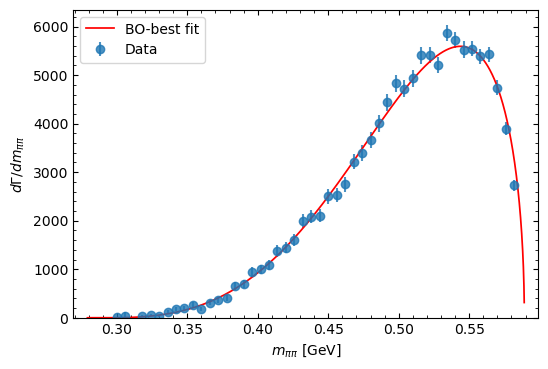

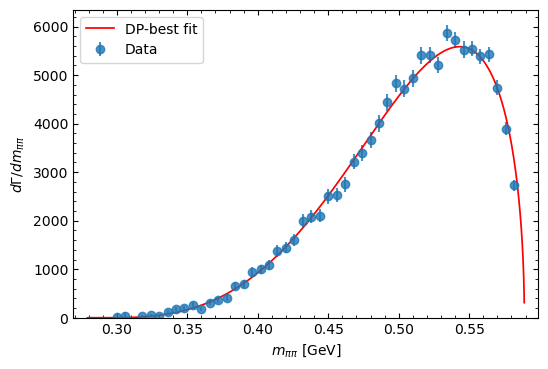

plt_best(fitm_BO, dΓmpipi_BO, datam, "BO-best fit") = PyObject Text(0, 0.5, '$d\\Gamma/dm_{\\pi\\pi}$')


PyObject Text(27.400000000000006, 0.5, '$d\\Gamma/dm_{\\pi\\pi}$')

In [65]:
@show plt_best(fitm_BO, dΓmpipi_BO,datam,"BO-best fit")
plt_best(fitm_DP, dΓmpipi_DP,datam,"DP-best fit")


The above two figures show the fit to the BESIII data and $c_1$ and $c_2$ in the amplitude $\mathcal M_0$ are extracted.

### Potential by dispersion relation

Now we have obtained the amplitude of $\psi'\to J/\psi\pi^+\pi^-$, which relates to the two $\pi$ exchange amplitude of $\psi' J/\psi\to\psi' J/\psi$  by unitarity, namely

\begin{equation}
    {\rm Im} M(s) = |{\cal M}_0(s)|^2 \rho(s), \qquad {\rm with}\quad \rho(s) = \frac1{16\pi}\sqrt{1-\frac{4M_\pi^2}{s}}.
\end{equation}

By dispersion relation, the potential reads
\begin{align}
   V_S(q^2) &= -\frac{1}{4M_{\psi'}M_{J/\psi} }\frac{2}{\pi} \int_{2M_\pi}^\infty d\mu \mu \frac{{\rm Im} M(\mu^2)}{\mu^2 + q^2}, \notag\\
   V_S(r) &= -\frac{1}{4M_{\psi'}M_{J/\psi} }\frac{1}{32\pi^3 } \int_{2M_\pi}^\infty d\mu \frac{e^{-\mu r}}{r} \sqrt{\mu^2-4M_\pi^2} |{\cal M}_0(s)|^2 
\end{align}

### Subtracted DR

***The dispersive integral above diverges and needs a subtraction***,
\begin{align*}
\mathcal M(s)&=\mathcal M(\bar s)+\frac{s-\bar s}{\pi}\int_{2m_\pi}^{\infty}\frac{\rm{Im}[\mathcal M(s')]\rm{d}s'}{(s'-\bar s)(s'-s-i\epsilon)}\\
\mathcal M(q^2)&=\mathcal M(\bar s)-\frac{q^2+\bar s}{\pi}\int_{2m_\pi}^{\infty}\frac{\rm{Im}[\mathcal M(\mu^2)]2\mu\rm{d}\mu}{(\mu^2-\bar s)(\mu^2+q^2-i\epsilon)}
\end{align*}
The potential now reads
\begin{align*}
V(q^2)&=-\frac{\mathcal M(q^2)}{4m_{\psi'}m_{J/\psi}}\\
V(r)&=\frac1{2\pi^2 r}\int_0^{\infty}q\sin(qr)V(q^2)e^{-q^2/\Lambda^2}\rm{d}q\\
&=-\frac{1}{4m_{\psi'}m_{J/\psi}}(V_0(r)+V_1(r))
\end{align*}
with $$V_0(r)=\frac1{2\pi^2 r}\mathcal M(\bar s)\int_0^{\infty}q\sin(qr)e^{-q^2/\Lambda^2}{\rm d}q$$
and 
\begin{align*}
V_1(r)&=\frac2\pi\int_{2m_\pi}^{\infty}\mu{\rm d}\mu \frac{\rm{Im}[\mathcal M(\mu^2)]}{\mu^2-\bar s}\frac1{2\pi^2 r}\int_0^{\infty}{\rm d}q\frac{-(q^2+\bar s)}{\mu^2+q^2}q\sin(qr)e^{-q^2/\Lambda^2}\\
&=\frac1{8\pi^2}\int_{2m_\pi}^{\infty}{\rm d}\mu \frac{\sqrt{\mu^2-4m_\pi^2}|\mathcal M_0(\mu^2)|^2}{\mu^2-\bar s}\frac1{2\pi^2 r}\int_0^{\infty}{\rm d}q\frac{-(q^2+\bar s)}{\mu^2+q^2}q\sin(qr)e^{-q^2/\Lambda^2}
\end{align*}

***Here we are left with a subtraction constant $\mathcal M(\bar s)$, which needs to be fixed by matching some known results.***

# $\eta$ exchange

$\psi'(P)\to\psi(p_a)\eta(p_b)$

The angular momentum between $\psi\eta$ is $L=1$ and hence the covariant amplitude is constructed as

$\mathcal{M}_0=C \epsilon^{\mu\nu\rho\sigma}P_\mu\psi'_{\nu}\psi^*_{\rho} q_\sigma$

with $q=p_a-p_b$. The heavy quark spin symmetry requires the polarization of $J/\psi$ and $\psi'$ to be the same, which leads to $\mathcal M_0=0$. Let's consider the breaking of HQSS and first estimate the  order of magnitude of $|\mathcal M_0|$. The decay width of $\psi'\to J/\psi\eta$ is $296\times 0.0336=9.95$ keV.

$\Gamma=\frac{|{\bf p}|}{8\pi m_{\psi'}^2}|\mathcal M_0|^2$ with $|{\bf p}|=0.199$ GeV results in $|\mathcal M_0|^2\sim0.02\, \rm{GeV}^2$ and $C\sim 0.1\, \rm{GeV}^{-1}$.

Then the amplitude of $\psi'J/\psi\to\psi'J/\psi$ by $\eta$ exchange are approximately $\mathcal M\sim \frac{|\mathcal M_0|^2}{|{\bf q}|^2+m_\eta^2-i\epsilon}$, namely the potential $V(r)\sim \frac{0.02\rm{GeV}^2}{4m_\psi m_{\psi'}} Y(m_\eta r)\sim 4\times 10^{-4} Y(m_\eta r)$ with $Y$ the Yukawa potential. In the above we have obtained that two $\pi$ exchange yileds a potential $V(r)>\frac{10\,\rm{GeV}^2}{4m_\psi m_{\psi'}} Y\sim 0.2Y$, which is much larger than $\eta$ exchange.

To be more precise, we calculate the amplitude of $\psi'J/\psi\to\psi'J/\psi$ by $\eta$ exchange directly.

![eta exchange potential](etaexpo.jpg)